word activator : https://github.com/LintangWisesa/Microsoft_Office_2016_Activator

# Chapter 1: Discussing Preliminaries

In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

def show_image(img_path, figsize=(10, 8)):
    """
    Displays an image with the specified size.

    :param img_path: Relative or absolute path to the image
    :param figsize: Tuple specifying the width and height of the displayed image (optional)
    """
    # Get the absolute path of the image using relative path
    abs_path = os.path.abspath(img_path)

    # Read the image using matplotlib
    img = mpimg.imread(abs_path)

    # Create the figure with the specified size
    plt.figure(figsize=figsize)

    # Display the image inline within the Jupyter notebook
    plt.imshow(img)
    plt.axis('off')  # Hide axes for a cleaner view
    plt.show()


In [7]:
adult = pd.read_csv("../data/adult_with_pii.csv")
adult.head()

,Name,DOB,SSN,Zip,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,Karrie Trusslove,9/7/1967,732-14-6110,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Brandise Tripony,6/7/1988,150-19-2766,61523,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Brenn McNeely,8/6/1991,725-59-9860,95668,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Dorry Poter,4/6/2009,659-57-4974,25503,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Dick Honnan,9/16/1951,220-93-3811,75387,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## De-Identification

* `De-identification`: process of removing *identifying information*
* Also sometimes termed as *anonymisation* of identifying information, in banks known as *personally identifiable information*
* Simple form: just simply delete data that contains private inforamtion

In [8]:
adult_data = adult.copy().drop(columns=['Name', 'SSN'])
adult_pii = adult[['Name', 'SSN', 'DOB', 'Zip']]

In [10]:
adult_data.head(1)

,DOB,Zip,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,9/7/1967,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


* This now has resulted in a `De-Identified` data as shown termed as `adult_head`

## Linkage Attacks

* Occurs when knowledge about an entity is prevalent
* Since these are known, all we do is `filter` these out
* And `join` with the those values we are aware of
* Which leads to exposure of all the fields of that `known entity` which is now `exposed`
* In Pandas, this is accomplished using `merge`

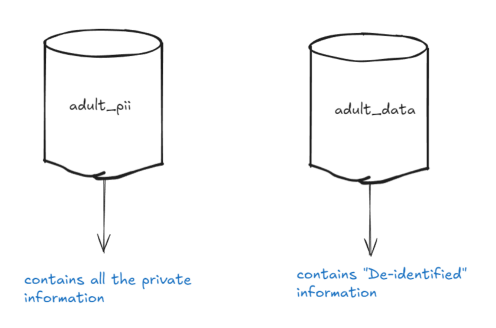

In [43]:
show_image(r'..\imgs\1_databases.png', figsize=(9, 4))

In [44]:
karries_filtered_row = adult_pii[adult_pii['Name'] == 'Karrie Trusslove']
pd.merge(karries_filtered_row, adult_data, left_on=['DOB', 'Zip'], right_on=['DOB', 'Zip'])

,Name,SSN,DOB,Zip,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,Karrie Trusslove,732-14-6110,9/7/1967,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


* Hence as you see before I am able to retrieve information on `Karrie Trusslove` using a simple `.join` function
* This is equivalent of : a) using an `auxiliary data`   to   b) `re-identify` and individual   using an   c) `de-identified` dataset
* Sometime it is easy enough to *re-identify* an individual using a single data point as shown
* In our case just the `name` and `Zip` is enough

In [46]:
pd.merge(karries_filtered_row, adult_data, left_on=['Zip'], right_on=['Zip'])

,Name,SSN,DOB_x,Zip,DOB_y,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,Karrie Trusslove,732-14-6110,9/7/1967,64152,9/7/1967,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [47]:
pd.merge(karries_filtered_row, adult_data, left_on=['DOB'], right_on=['DOB'])

,Name,SSN,DOB,Zip_x,Zip_y,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,Karrie Trusslove,732-14-6110,9/7/1967,64152,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Karrie Trusslove,732-14-6110,9/7/1967,64152,67306,64,Private,171373,11th,7,Widowed,Farming-fishing,Unmarried,White,Female,0,0,40,United-States,<=50K
2,Karrie Trusslove,732-14-6110,9/7/1967,64152,62254,46,Self-emp-not-inc,119944,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
